이 노트북의 코드에 대한 설명은 [QuantileTransformer](https://tensorflow.blog/2018/01/14/quantiletransformer/) 글을 참고하세요.

In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy

CPython 3.5.6
IPython 6.5.0

sklearn 0.20.1
numpy 1.15.2
scipy 1.1.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer

In [3]:
X, y = make_blobs(n_samples=500, centers=2, random_state=4)

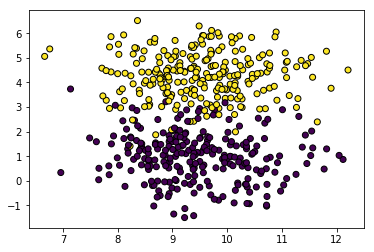

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')
plt.show()

In [5]:
quan = QuantileTransformer(n_quantiles=100)
quan.fit(X)
print(quan.quantiles_.shape)

(100, 2)


In [6]:
quan.quantiles_[:10]

array([[ 6.6657781 , -1.49206421],
       [ 7.61210918, -1.01990633],
       [ 7.78824053, -0.78260893],
       [ 7.85516648, -0.63070686],
       [ 7.9626143 , -0.45347682],
       [ 8.03441051, -0.28360524],
       [ 8.11006792, -0.19981671],
       [ 8.16790251, -0.15642171],
       [ 8.23657329, -0.0964701 ],
       [ 8.27507964, -0.01707259]])

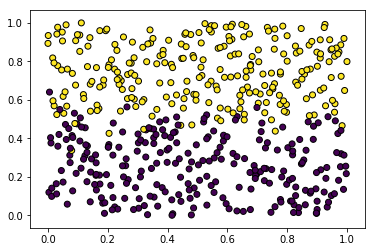

In [7]:
X_quan = quan.transform(X)
plt.scatter(X_quan[:, 0], X_quan[:, 1], c=y, edgecolors='black')
plt.show()

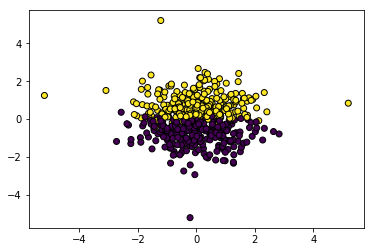

In [8]:
quan = QuantileTransformer(output_distribution='normal', n_quantiles=100)
X_quan = quan.fit_transform(X)
plt.scatter(X_quan[:, 0], X_quan[:, 1], c=y, edgecolors='black')
plt.show()

In [9]:
X_quan.mean(axis=0), X_quan.std(axis=0)

(array([-0.00172502, -0.00134149]), array([1.0412595 , 1.03818794]))

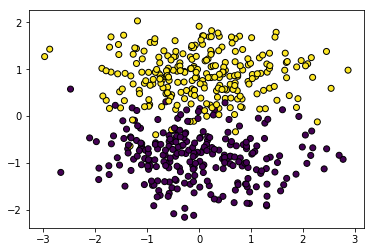

In [10]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
plt.scatter(X_std[:, 0], X_std[:, 1], c=y, edgecolors='black')
plt.show()